In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('creditcard.csv')

# Data exploration
print(data.head())
print(data.info())
print(data.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<ipython-input-11-28baa1cd40ae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


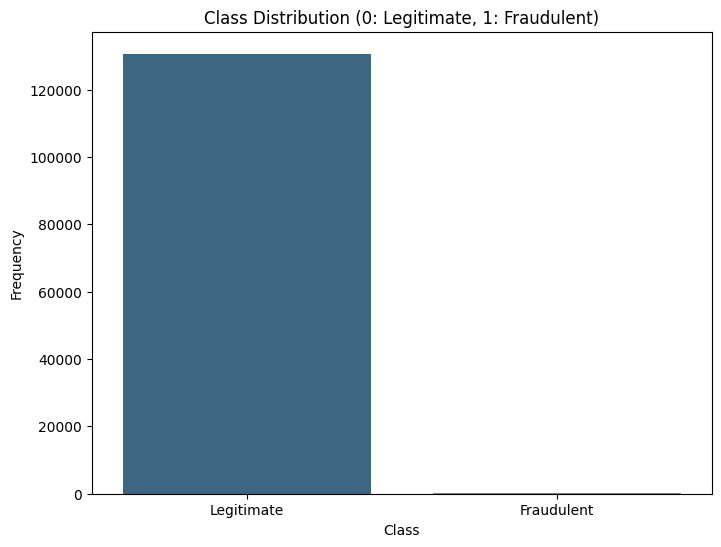

Class
0.0    130681
1.0       261
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
class_distribution = data['Class'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution (0: Legitimate, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.show()

class_distribution


In [ ]:
# Anomaly Detection
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv('creditcard.csv')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data))
data_imputed.columns = data.columns

# Initialize and fit the model (using imputed data)
isolation_forest = IsolationForest(contamination=0.001)
data_imputed['anomaly'] = isolation_forest.fit_predict(data_imputed.drop('Class', axis=1))

# Identify anomalies
anomalies = data_imputed[data_imputed['anomaly'] == -1]
print(anomalies.head())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


         Time         V1         V2         V3         V4         V5  \
1632   1264.0 -11.140706  -9.612726 -12.389545   6.013346 -32.092129   
2963   2507.0  -6.200114   5.025406  -2.742492  -0.940903  -6.656259   
6812   8592.0 -23.066842 -25.640527  -3.080313   4.866932   6.901397   
8296  11080.0  -2.125490   5.973556 -11.034727   9.007147  -1.689451   
8610  11621.0 -27.670569 -34.607649   2.243079  10.463020  34.099309   

             V6         V7         V8        V9  ...       V22        V23  \
1632  21.393069  34.303177  -7.520784 -1.925732  ...  1.366110  -2.925888   
2963   5.432294  -9.198175 -22.588547 -3.244295  ...  4.393846   1.943002   
6812  -4.074335   2.027345  -2.688652  3.402966  ...  3.312971  13.876221   
8296  -2.854415  -7.810441   2.030870 -5.902828  ... -0.278485  -0.664841   
8610 -23.496714 -26.548144  -0.779134  7.496577  ... -1.627883 -11.669994   

           V24       V25       V26       V27       V28   Amount  Class  \
1632  0.843551  0.746267  0.80

In [ ]:
#Feature Engineering

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
# Use data_imputed instead of data
X = data_imputed.drop(['Class', 'anomaly'], axis=1)
y = data_imputed['Class']

# Ensure 'y' is of integer type for classification
y = y.astype(int) # Convert y to integer type

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
#Machine Learning Models:

#1) Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26120
           1       0.98      0.93      0.95     26153

    accuracy                           0.96     52273
   macro avg       0.96      0.96      0.96     52273
weighted avg       0.96      0.96      0.96     52273

AUC-ROC: 0.99


In [ ]:
# 2) Decision Trees

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_dt):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26120
           1       1.00      1.00      1.00     26153

    accuracy                           1.00     52273
   macro avg       1.00      1.00      1.00     52273
weighted avg       1.00      1.00      1.00     52273

AUC-ROC: 1.00


In [ ]:
# 3) Neural Networks

from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_mlp):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26120
           1       1.00      1.00      1.00     26153

    accuracy                           1.00     52273
   macro avg       1.00      1.00      1.00     52273
weighted avg       1.00      1.00      1.00     52273

AUC-ROC: 1.00


In [ ]:
# Real-time Monitoring

import time

# Function to predict fraud in real-time
def predict_fraud(transaction, model, scaler):
    transaction_scaled = scaler.transform(transaction.values.reshape(1, -1))
    prediction = model.predict(transaction_scaled)
    return prediction[0]

# Real-time monitoring function
def real_time_monitoring(stream, model, scaler):
    for transaction in stream:
        prediction = predict_fraud(transaction.drop(['Class']), model, scaler)
        if prediction == 1:
            print(f"ALERT: Fraudulent transaction detected!\nTransaction details: {transaction}\n")

# Stream simulation
def stream_transactions(data, delay=1.0):
    for index, row in data.iterrows():
        yield row
        time.sleep(delay)  # Simulate real-time delay

# Simulate real-time monitoring with sample data
sample_data = data.sample(n=100).reset_index(drop=True)
real_time_monitoring(stream_transactions(sample_data), lr, scaler)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

ALERT: Fraudulent transaction detected!
Transaction details: Time      63143.000000
V1            1.294948
V2            0.550479
V3           -0.860917
V4            0.937554
V5            0.856967
V6            0.063075
V7            0.158999
V8            0.009307
V9            0.078460
V10          -0.594686
V11          -1.065945
V12          -0.669573
V13          -0.252884
V14          -1.019160
V15           1.462316
V16           0.640957
V17           0.468121
V18           0.528724
V19          -0.410599
V20          -0.120641
V21          -0.121553
V22          -0.258780
V23          -0.257410
V24          -1.449130
V25           0.790295
V26          -0.209538
V27           0.043618
V28           0.032682
Amount        1.000000
Class         0.000000
Name: 85, dtype: float64



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

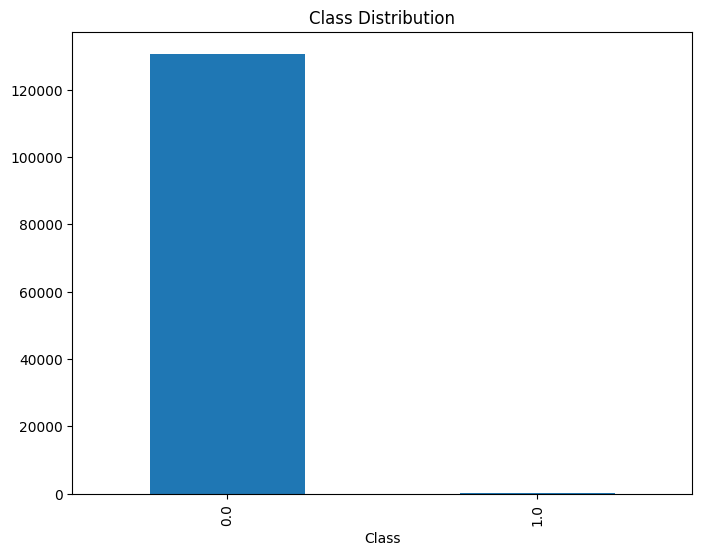

In [29]:
# Class distribution
data['Class'].value_counts().plot(kind='bar', figsize=(8, 6), title='Class Distribution')
plt.show()

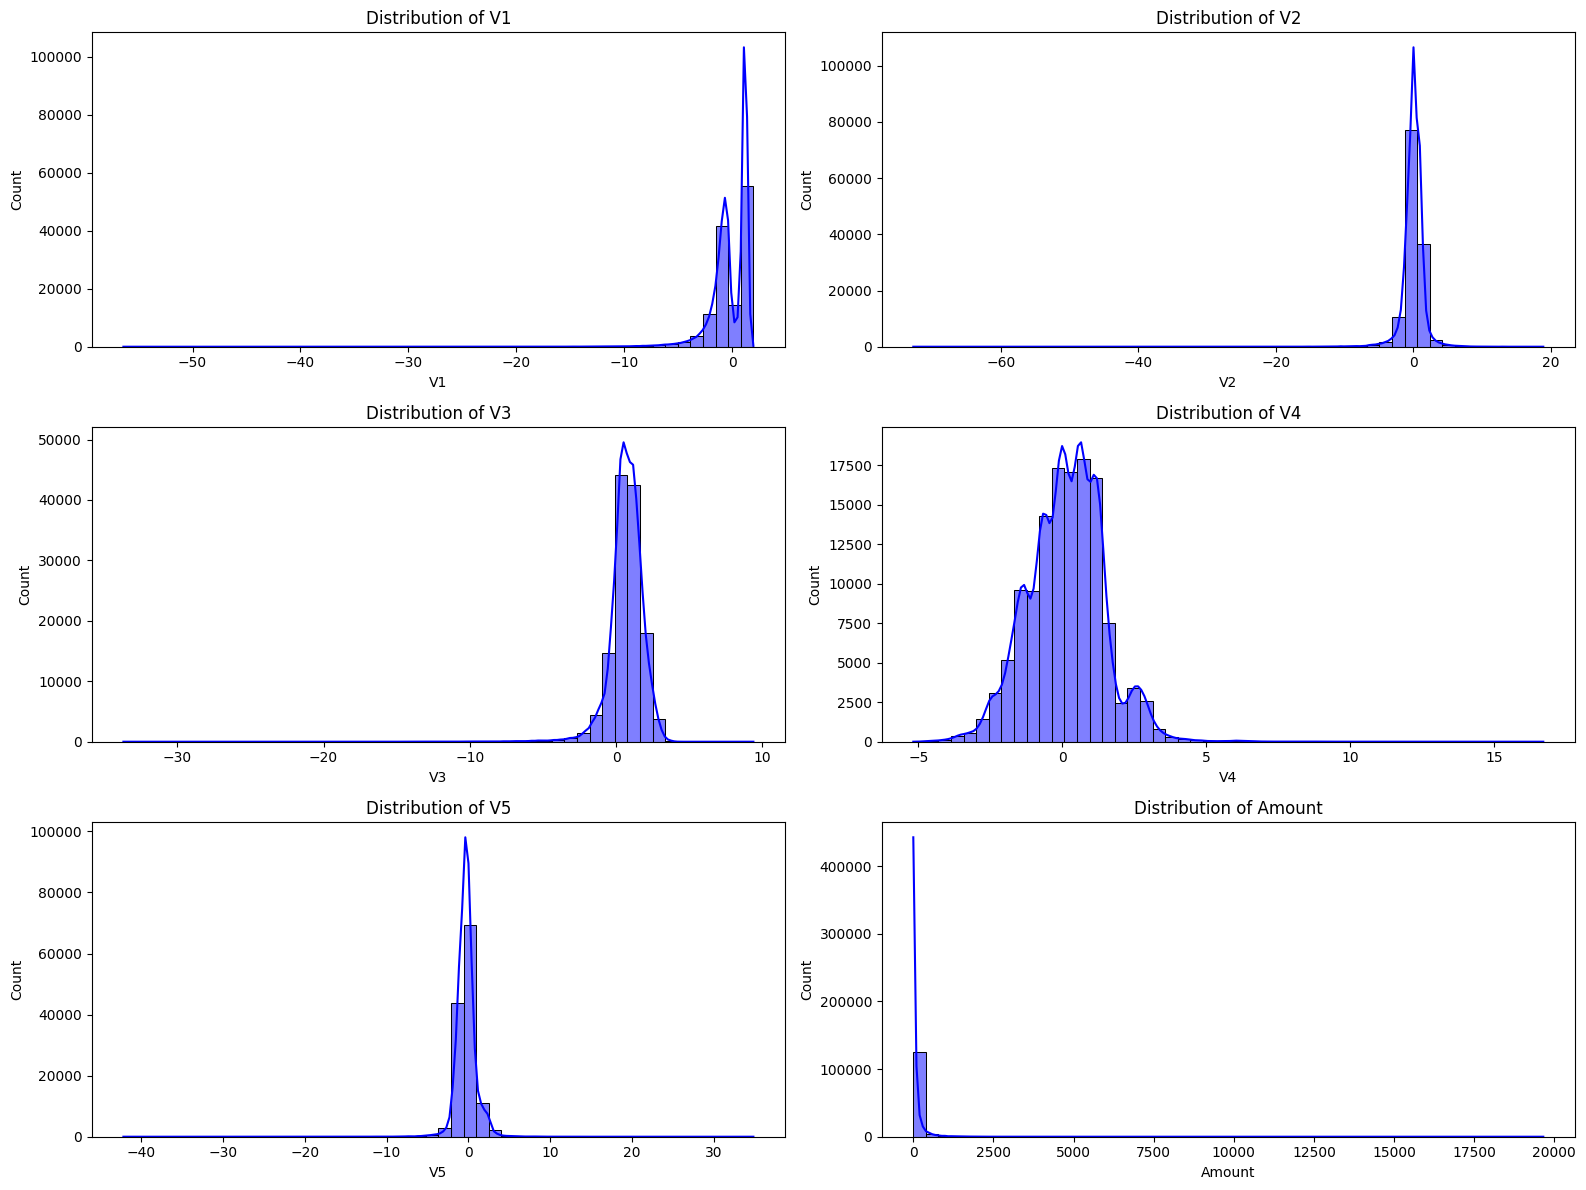

In [30]:
# Feature distributions
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], bins=50, kde=True,color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


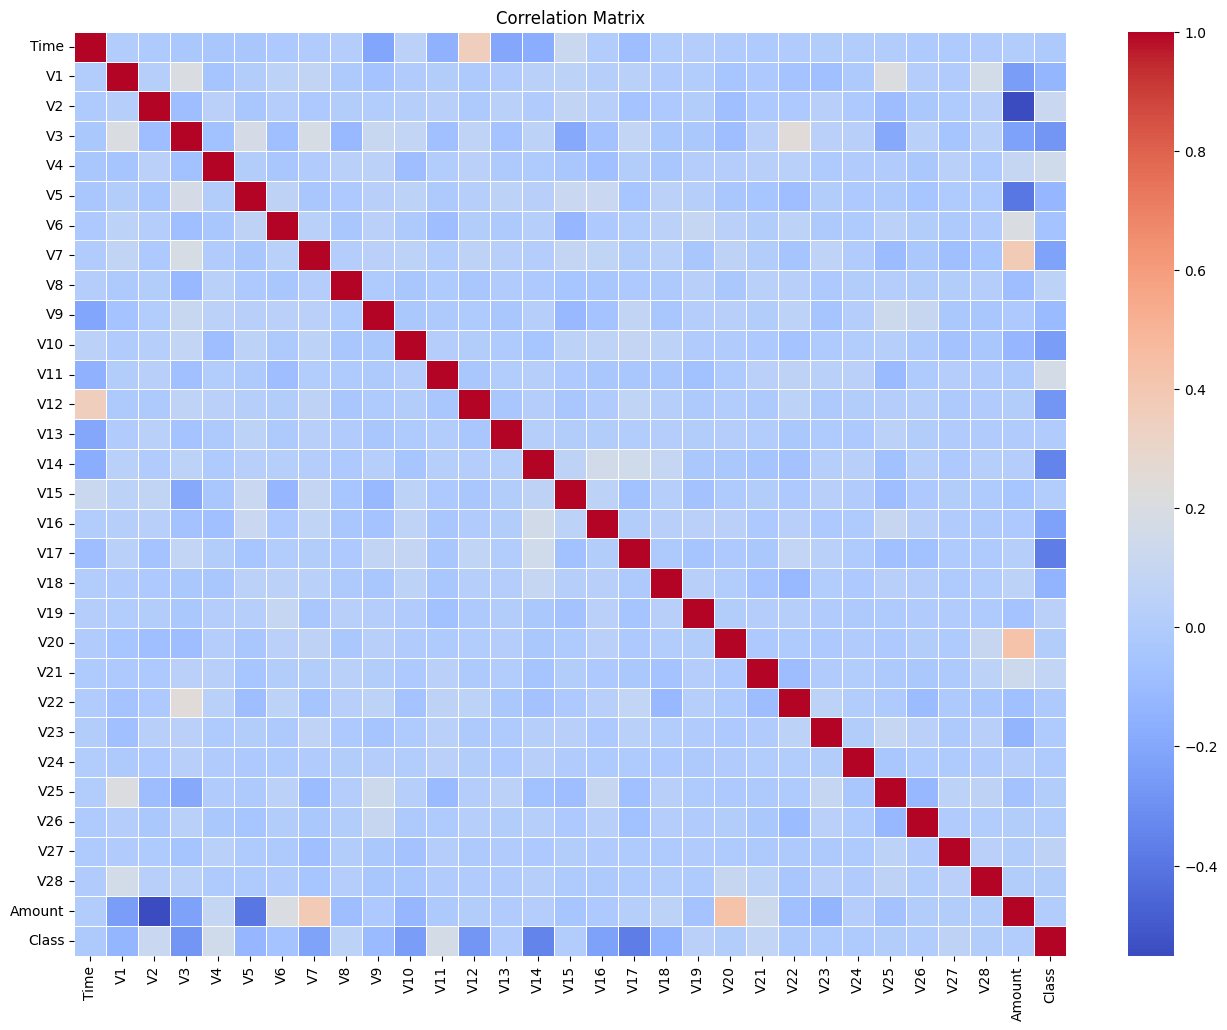

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


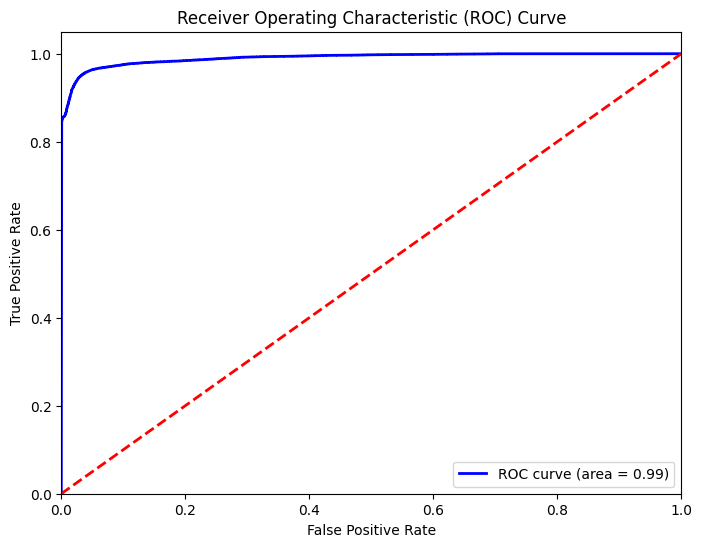

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


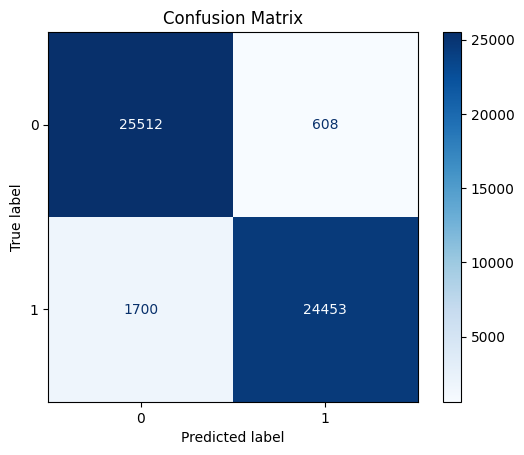

In [ ]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
